In [1]:
import numpy as np
import MEG_analysis as meg
import mne

In [2]:
folder = meg.get_folder_dict()

In [3]:
raw = meg.get_raw(folder['../../../../MEG_raw01/161101_amano_SD'])

['../../../../MEG_raw01/161101_amano_SD/20161101_1335_SD_68_IASoff_raw.fif', '../../../../MEG_raw01/161101_amano_SD/20161101_1345_SD_68_IASoff_raw.fif', '../../../../MEG_raw01/161101_amano_SD/20161101_1354_SD_68_IASoff_raw.fif', '../../../../MEG_raw01/161101_amano_SD/20161101_1403_SD_68_IASoff_raw.fif', '../../../../MEG_raw01/161101_amano_SD/20161101_1412_SD_68_IASoff_raw.fif', '../../../../MEG_raw01/161101_amano_SD/20161101_1421_SD_68_IASoff_raw.fif', '../../../../MEG_raw01/161101_amano_SD/20161101_1430_SD_68_IASoff_raw.fif', '../../../../MEG_raw01/161101_amano_SD/20161101_1439_SD_68_IASoff_raw.fif']


In [4]:
ica = mne.preprocessing.ICA(n_components=0.8, random_state=0, max_iter=100)
ica.fit(raw)

Fitting ICA to data using 204 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by explained variance: 121 components
Fitting ICA took 461.5s.


<ICA | raw data decomposition, fit (fastica): 4056000 samples, 121 components, channels used: "grad">

In [5]:
n_max_ecg, n_max_eog = 3, 1

Reconstructing ECG signal from Gradiometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Number of ECG events detected : 6164 (average pulse 91 / min.)
Not setting metadata
Not setting metadata
6164 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 5)
Loading data for 6164 events and 1001 original time points ...
13 bad epochs dropped
Reconstructing ECG signal from Gradiometers
<ipython-input-6-1c3f18178bc0>:2: DeprecationWarning: The default for "threshold" will change from None to"auto" in version 0.2

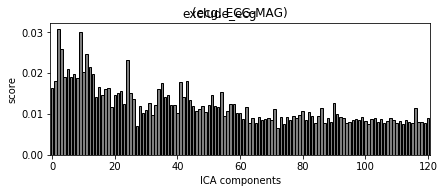

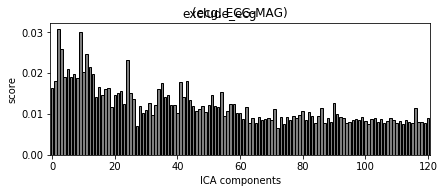

In [6]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw, tmin=-.5, tmax=.5)
ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, method='ctps')
ica.plot_scores(scores, exclude=ecg_inds, title="exclude_ecg", labels='ecg')

[]


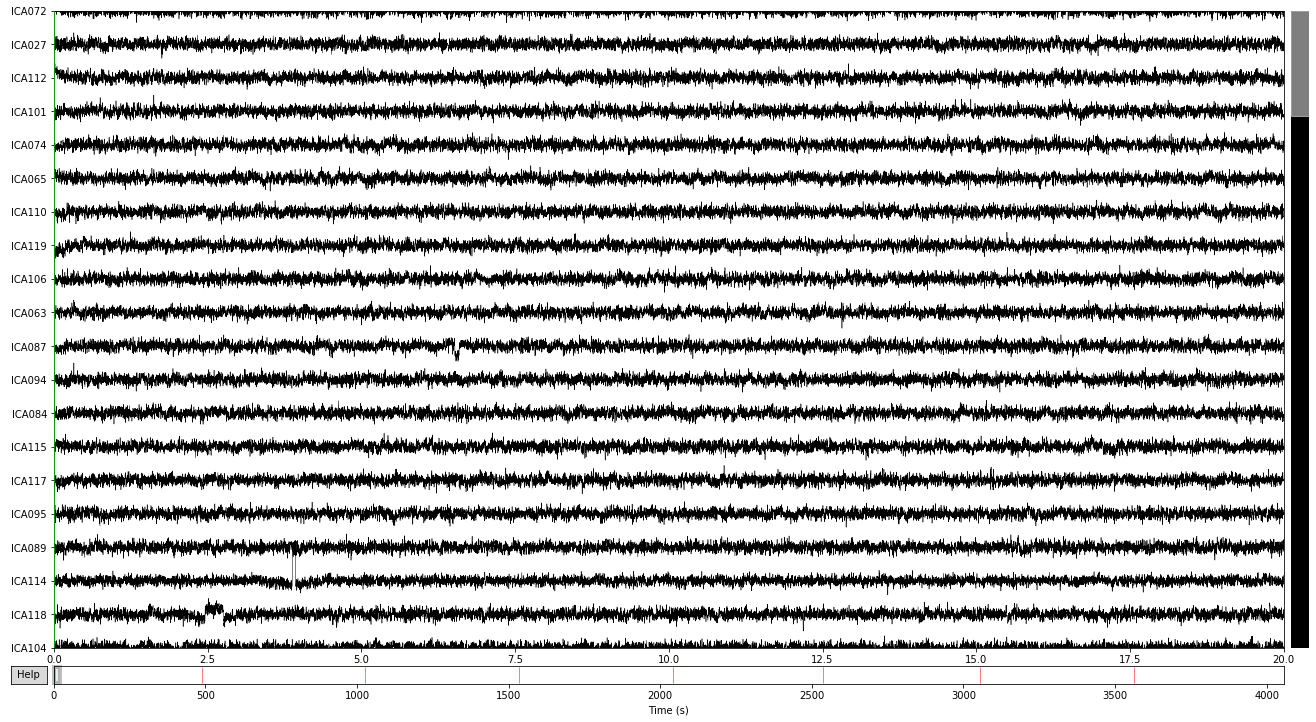

ValueError: No appropriate channels found for the given picks ([])

In [7]:
show_picks = np.abs(scores).argsort()
print(ecg_inds)
ica.plot_sources(raw, show_picks, title="ecg")
ica.plot_components(ecg_inds, title="ecg", colorbar=True)

In [12]:
ecg_inds = ecg_inds[:n_max_ecg]
ica.exclude += ecg_inds

In [13]:
eog_inds, scores = ica.find_bads_eog(raw)
ica.plot_scores(scores, exclude=eog_inds, title="eog", labels="eog")

No EOG channels found
Trying with EEG 061 and EEG 062


RuntimeError: EEG 61 or EEG 62 channel not found !!

In [ ]:
show_picks = np.abs(scores).argsort()
ica.plot_sources(raw, show_picks, exclude=eog_inds, title="ecg")
ica.plot_components(eog_inds, title="ecg", colorbar=True)

In [ ]:
eog_inds = eog_inds[:n_max_eog]
ica.exclude += eog_inds